<a href="https://colab.research.google.com/github/mahmoudradwaan98/mahmoudradwaan98/blob/main/MBC_simple_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
def getAccuracy(model, x, y):
  return model.score(x,y)*100

In [ ]:
X = np.array([[1.3, 3.3],
             [1.4, 2.5],
             [1.8, 2.8],
             [1.9, 3.1],
             [1.5, 1.5],
             [1.8, 2],
             [2.3, 1.9],
             [2.6, 1.4],
             [2.4, 2.2],
             [2.4, 3],
             [2.7, 2.7],
             [2, 3.2]])

In [ ]:
y = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3])

In [ ]:
y

array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3])

In [ ]:
model = svm.SVC(kernel='linear', decision_function_shape='ovo', C=200)
model.fit(X, y)
print('Accuracy of model: {:.2f}%'.format(getAccuracy(model, X, y)))

Accuracy of model: 100.00%


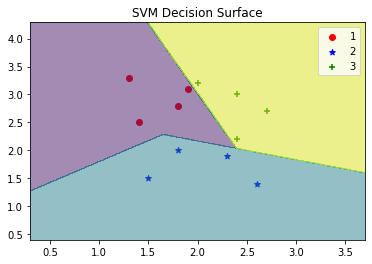

In [ ]:
plt.scatter(X[y == 1,0], X[y == 1,1], c='r', marker='o', label=1)
plt.scatter(X[y == 2,0], X[y == 2,1], c='b', marker='*', label=2)
plt.scatter(X[y == 3,0], X[y == 3,1], c='g', marker='+', label=3)


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z= z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.5)



plt.title('SVM Decision Surface')
plt.legend()
plt.show()

## ***Multiple Binary Classifier***

In [ ]:
yb = y.reshape((-1,1))
yb

array([[1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [3],
       [3],
       [3],
       [3]])

In [ ]:
mlb = MultiLabelBinarizer()
yb = mlb.fit_transform(yb)
yb

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [ ]:
yb1 = yb[:,0]
yb2 = yb[:,1]
yb3 = yb[:,2]

In [ ]:
clf_1 = svm.SVC(kernel='linear', probability=True)
clf_1.fit(X, yb1)
print('Accuracy of clf_1: {:.2f}%'.format(getAccuracy(clf_1, X, yb1)))
yb1_pred = clf_1.predict_proba(X)[:,1].reshape(-1,1)

Accuracy of clf_1: 83.33%


In [ ]:
clf_2 = svm.SVC(kernel='linear', probability=True)
clf_2.fit(X, yb2)
print('Accuracy of clf_2: {:.2f}%'.format(getAccuracy(clf_2, X, yb2)))
yb2_pred = clf_2.predict_proba(X)[:,1].reshape(-1,1)

Accuracy of clf_2: 100.00%


In [ ]:
clf_3 = svm.SVC(kernel='linear', probability=True)
clf_3.fit(X, yb3)
print('Accuracy of clf_3: {:.2f}%'.format(getAccuracy(clf_3, X, yb3)))
yb3_pred = clf_3.predict_proba(X)[:,1].reshape(-1,1)

Accuracy of clf_3: 83.33%


In [ ]:
yb_all = np.hstack((yb1_pred, yb2_pred, yb3_pred))
yb_all

array([[0.65499531, 0.05847771, 0.26145522],
       [0.43411289, 0.28121483, 0.16093872],
       [0.39080283, 0.14929944, 0.30531367],
       [0.43270887, 0.07749832, 0.4009428 ],
       [0.2027595 , 0.80592878, 0.0793243 ],
       [0.22534316, 0.54162082, 0.17193849],
       [0.12680129, 0.57394234, 0.27274529],
       [0.06103968, 0.80596726, 0.26145547],
       [0.14760304, 0.39255482, 0.36467663],
       [0.27565552, 0.0873279 , 0.54672182],
       [0.16531728, 0.15491415, 0.57894213],
       [0.42764493, 0.06083423, 0.45682619]])

In [ ]:
m = mlb.classes_[np.argmax(yb_all, axis=1)]
m.reshape((-1,1))

array([[1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [3],
       [3],
       [3]], dtype=object)